<a href="https://colab.research.google.com/github/Vykhrystenko/NM_FIT_2_9_Vykhrystenko/blob/main/%D0%9B%D0%B0%D0%B1_%E2%84%968_%D0%92%D0%B8%D1%85%D1%80%D0%B8%D1%81%D1%82%D0%B5%D0%BD%D0%BA%D0%BE_%D0%923_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Вихристенко Владислав. Варіант 3. Присутній на парі

Знаходження значень першої та другої похідних за даних значень аргумента
для функції y = f (x) заданою таблицею:

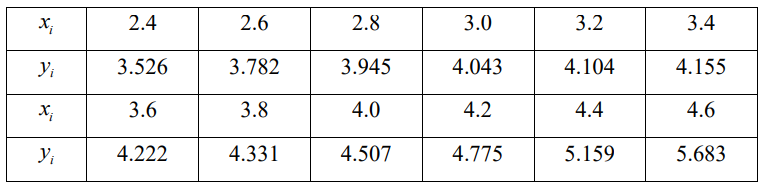

image.png

In [ ]:
import numpy as np
# Таблиця значень функції
x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155,4.222, 4.331, 4.507, 4.775, 5.159, 5.683])
# Крок таблиці
h = x_values[1] - x_values[0]
# Обчислення кінцевих різниць
def finite_differences(y):
  n = len(y)
  delta_y = np.zeros((n, n))
  delta_y[:, 0] = y
  for j in range(1, n):
    for i in range(n - j):
      delta_y[i, j] = delta_y[i + 1, j - 1] - delta_y[i, j
- 1]
  return delta_y
# Отримуємо таблицю кінцевих різниць
delta_table = finite_differences(y_values)
# Виводимо таблицю кінцевих різниць для наочності
print("Таблиця кінцевих різниць:")
np.set_printoptions(precision=4, suppress=True)
print(delta_table)
# Значення кінцевих різниць для першої та другої похідних
delta_y1 = delta_table[1, 1] # Δy1
delta2_y1 = delta_table[1, 2] # Δ²y1
delta3_y1 = delta_table[1, 3] # Δ³y1
delta4_y1 = delta_table[1, 4] # Δ⁴y1
# Функція для обчислення першої похідної за формулою Ньютона
def first_derivative(delta_y1, delta2_y1, delta3_y1, delta4_y1,
h):
  return (delta_y1 - delta2_y1 / 2 + delta3_y1 / 3 - delta4_y1
/ 4) / h
# Функція для обчислення другої похідної за формулою Ньютона
def second_derivative(delta2_y1, delta3_y1, delta4_y1, h):
  return (delta2_y1 - delta3_y1 + 11*delta4_y1 / 12) / h**2
# Обчислюємо першу та другу похідні в точці x = 0.1
y1_prime = first_derivative(delta_y1, delta2_y1, delta3_y1,
delta4_y1, h)
y1_double_prime = second_derivative(delta2_y1, delta3_y1,
delta4_y1, h)
y1_prime = round(y1_prime, 3)
y1_double_prime = round(y1_double_prime, 3)
# Виводимо результати
print(f"\nПерша похідна y'(2.6) ≈ {y1_prime}")
print(f"Друга похідна y''(2.6) ≈ {y1_double_prime}")

Таблиця кінцевих різниць:
[[ 3.526  0.256 -0.093  0.028 -0.    -0.001  0.001  0.    -0.003  0.01
  -0.025  0.056]
 [ 3.782  0.163 -0.065  0.028 -0.001 -0.     0.001 -0.003  0.007 -0.015
   0.031  0.   ]
 [ 3.945  0.098 -0.037  0.027 -0.001  0.001 -0.002  0.004 -0.008  0.016
   0.     0.   ]
 [ 4.043  0.061 -0.01   0.026  0.    -0.001  0.002 -0.004  0.008  0.
   0.     0.   ]
 [ 4.104  0.051  0.016  0.026 -0.001  0.001 -0.002  0.004  0.     0.
   0.     0.   ]
 [ 4.155  0.067  0.042  0.025  0.    -0.001  0.002  0.     0.     0.
   0.     0.   ]
 [ 4.222  0.109  0.067  0.025 -0.001  0.001  0.     0.     0.     0.
   0.     0.   ]
 [ 4.331  0.176  0.092  0.024  0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 4.507  0.268  0.116  0.024  0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 4.775  0.384  0.14   0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 5.159  0.524  0.     0.     0.     0.     0.     0.     0.     0.
   0.     0.   ]
 [ 5.683  0.     0. 

Побудова графіку функції


Інтерполяційна функція:
       3         2
0.538 x - 5.302 x + 17.67 x - 15.78


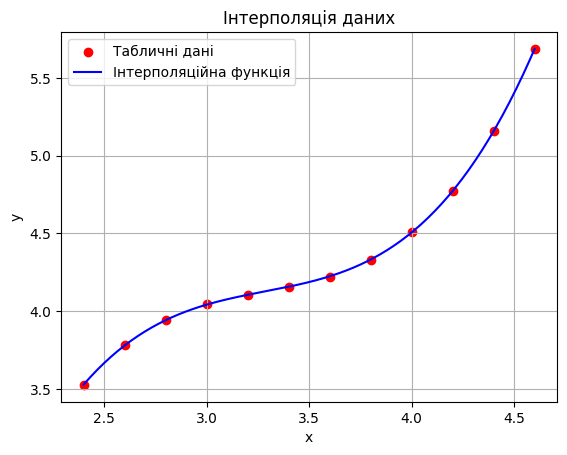

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x_values = np.array([2.4, 2.6, 2.8, 3.0, 3.2, 3.4, 3.6, 3.8, 4.0, 4.2, 4.4, 4.6])
y_values = np.array([3.526, 3.782, 3.945, 4.043, 4.104, 4.155, 4.222, 4.331, 4.507, 4.775, 5.159, 5.683])

coeffs = np.polyfit(x_values, y_values, 3)
poly = np.poly1d(coeffs)

print("Інтерполяційна функція:")
print(poly)

x_new = np.linspace(2.4, 4.6, 200)
y_new = poly(x_new)

plt.scatter(x_values, y_values, color='red', label='Табличні дані')
plt.plot(x_new, y_new, color='blue', label='Інтерполяційна функція')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція даних')
plt.grid(True)
plt.show()


Побудова графіків першої та другої похідних

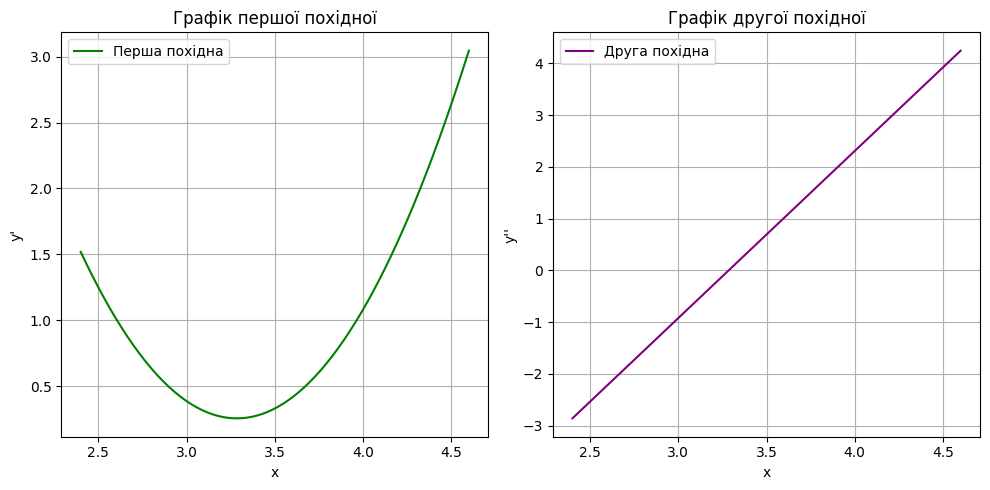

In [ ]:
# Обчислюємо першу та другу похідні полінома
poly_prime = poly.deriv()
poly_double_prime = poly_prime.deriv()

# Обчислюємо значення похідних на нових x
y_prime_new = poly_prime(x_new)
y_double_prime_new = poly_double_prime(x_new)

# Побудова графіків похідних
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(x_new, y_prime_new, color='green', label="Перша похідна")
plt.xlabel('x')
plt.ylabel("y'")
plt.title("Графік першої похідної")
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x_new, y_double_prime_new, color='purple', label="Друга похідна")
plt.xlabel('x')
plt.ylabel("y''")
plt.title("Графік другої похідної")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()